In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.impute import SimpleImputer

In [9]:
df=pd.read_csv('restaurant1.csv')

In [13]:
df.sample(4)

,Name,Location,Cuisine,Rating,Seats,AverageMealPrice,MarketingBudget,SocialMediaFollowers,ChefExperienceYears,NumberofReviews,AvgReviewLength,AmbienceScore,ServiceQualityScore,ParkingAvailability,WeekendReservations,WeekdayReservations,Revenue
1789,Restaurant 1789,Suburban,Italian,4.8,54,52.06,3528,35147,1,922,54.634802,5.4,2.0,Yes,41,0,631389.37
1346,Restaurant 1346,Suburban,Indian,4.6,69,37.30,1199,13161,12,387,208.157605,3.0,6.0,No,50,32,586429.45
5564,Restaurant 5564,Suburban,French,3.5,69,55.36,2745,35689,11,225,120.038955,3.6,6.7,Yes,28,68,864361.47
724,Restaurant 724,Downtown,Italian,3.2,89,46.12,2896,35242,7,106,180.740891,4.6,4.4,No,13,2,917434.82


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  8368 non-null   object 
 1   Location              8368 non-null   object 
 2   Cuisine               8368 non-null   object 
 3   Rating                8368 non-null   float64
 4   Seats                 8368 non-null   int64  
 5   AverageMealPrice      8368 non-null   float64
 6   MarketingBudget       8368 non-null   int64  
 7   SocialMediaFollowers  8368 non-null   int64  
 8   ChefExperienceYears   8368 non-null   int64  
 9   NumberofReviews       8368 non-null   int64  
 10  AvgReviewLength       8368 non-null   float64
 11  AmbienceScore         8368 non-null   float64
 12  ServiceQualityScore   8368 non-null   float64
 13  ParkingAvailability   8368 non-null   object 
 14  WeekendReservations   8368 non-null   int64  
 15  WeekdayReservations  

In [16]:
df.isnull().sum()

,0
Name,0
Location,0
Cuisine,0
Rating,0
Seats,0
AverageMealPrice,0
MarketingBudget,0
SocialMediaFollowers,0
ChefExperienceYears,0
NumberofReviews,0


In [17]:
df.columns

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seats', 'AverageMealPrice',
       'MarketingBudget', 'SocialMediaFollowers', 'ChefExperienceYears',
       'NumberofReviews', 'AvgReviewLength', 'AmbienceScore',
       'ServiceQualityScore', 'ParkingAvailability', 'WeekendReservations',
       'WeekdayReservations', 'Revenue'],
      dtype='object')

In [18]:
sam=df.drop(columns=['Name', 'Location', 'Cuisine', 'Rating', 'Seats','SocialMediaFollowers', 'ChefExperienceYears',
       'NumberofReviews', 'AvgReviewLength','ParkingAvailability', 'WeekendReservations',
       'WeekdayReservations',])

In [19]:
sam.sample(2)

,AverageMealPrice,MarketingBudget,AmbienceScore,ServiceQualityScore,Revenue
3610,39.26,3407,6.6,4.2,415841.68
3190,54.91,2863,9.2,1.6,986692.34


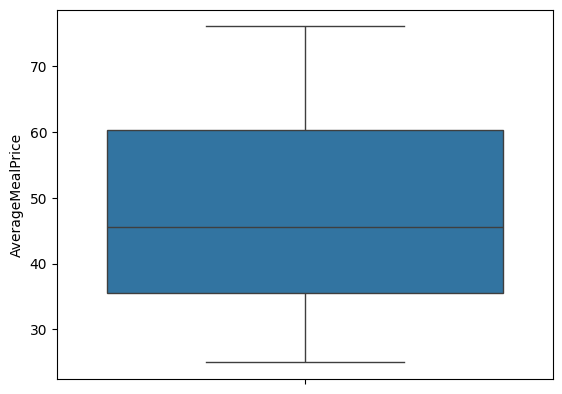

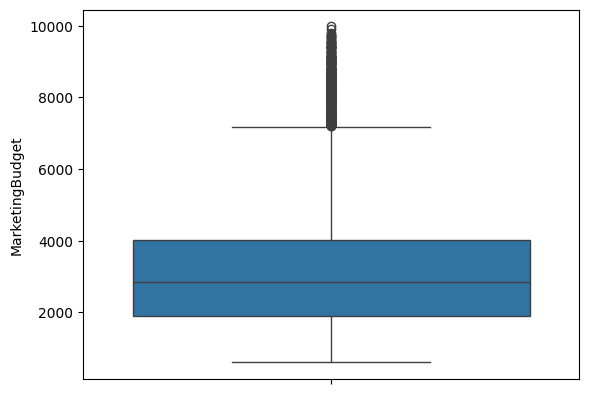

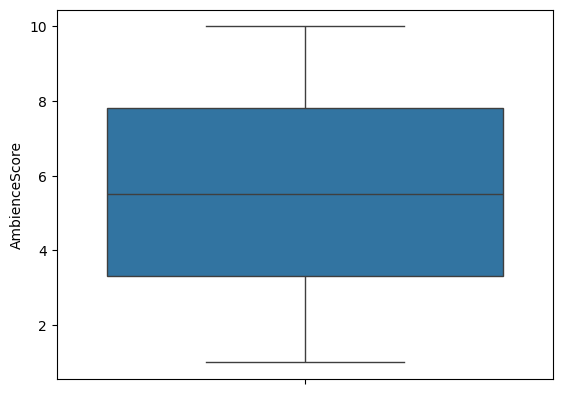

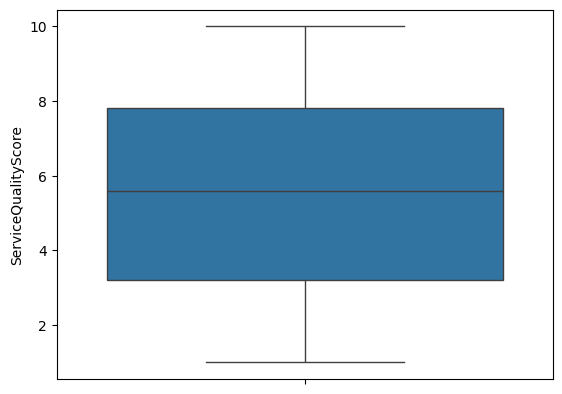

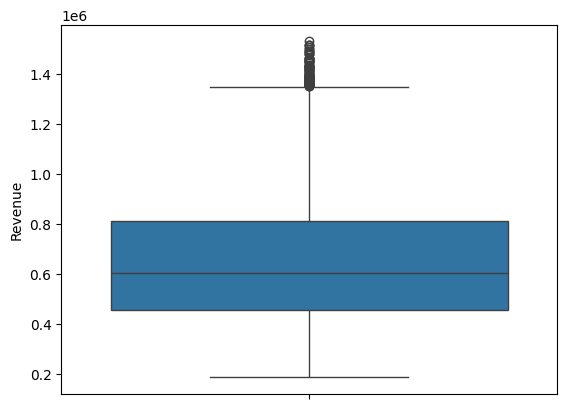

In [22]:
for i in sam.columns:
  sns.boxplot(data=sam,y=i)
  plt.show()

In [26]:
#removing outlier  of markketign
q1=sam['MarketingBudget'].quantile(0.25)
q3=sam['MarketingBudget'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
#replacig with mean

filtered_data=sam[(sam['MarketingBudget']>=lower) & (sam['MarketingBudget']<=upper)]
mean_value=filtered_data['MarketingBudget'].mean()
sam.loc[(sam['MarketingBudget']<=lower) & (sam['MarketingBudget']>=upper)]=mean_value

In [ ]:
#trainign the modell now

In [28]:
fea=sam.drop(columns=['Revenue'])
tar=sam['Revenue']

In [35]:
xtr,xte,ytr,yte=train_test_split(fea,tar,test_size=0.2)


In [36]:
xtr.shape

(6694, 4)

In [37]:
ytr.shape


(6694,)

In [38]:
model=Lasso(alpha=1)
model.fit(xtr,ytr)

Lasso(alpha=1)

In [40]:
y_pred=model.predict(xte)

In [43]:
r2scoreee=r2_score(yte,y_pred)

In [44]:
print(r2scoreee)

0.6204400727088388
